In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


In [0]:
import math

In [0]:
%matplotlib inline

In [0]:
company = pd.read_csv("ADANIPORTSALLN.csv")

In [0]:
company.columns


Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')

In [0]:
company

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ADANIPORTS,EQ,23-Aug-2017,375.65,378.10,386.20,378.10,385.00,385.00,382.33,3003871,1.148467e+09,43788,1456435,48.49
1,ADANIPORTS,EQ,24-Aug-2017,385.00,386.95,387.65,379.00,379.80,380.05,380.53,2507753,9.542675e+08,70769,1502442,59.91
2,ADANIPORTS,EQ,28-Aug-2017,380.05,382.00,389.85,380.50,387.70,387.50,387.29,3245331,1.256873e+09,85755,1833961,56.51
3,ADANIPORTS,EQ,29-Aug-2017,387.50,387.85,387.85,378.30,382.60,383.30,382.81,3419877,1.309155e+09,58505,2154296,62.99
4,ADANIPORTS,EQ,30-Aug-2017,383.30,386.00,392.40,385.05,389.15,389.75,388.80,2979277,1.158356e+09,77034,1536874,51.59
5,ADANIPORTS,EQ,31-Aug-2017,389.75,391.40,397.70,388.40,395.15,392.95,391.27,2775034,1.085793e+09,38097,1551332,55.90
6,ADANIPORTS,EQ,01-Sep-2017,392.95,394.95,396.50,391.70,394.70,394.90,394.28,1511368,5.959095e+08,31822,514295,34.03
7,ADANIPORTS,EQ,04-Sep-2017,394.90,396.00,396.00,380.30,384.25,384.85,385.05,2425859,9.340678e+08,79564,1028102,42.38
8,ADANIPORTS,EQ,05-Sep-2017,384.85,384.25,393.00,382.15,392.00,390.30,386.44,2363336,9.132760e+08,40886,1017134,43.04
9,ADANIPORTS,EQ,06-Sep-2017,390.30,388.90,388.90,384.40,385.00,385.05,386.40,1825546,7.053876e+08,42878,932721,51.09


# Data Preprocessing

In [0]:
#Two types of trading Intraday and delivery
#Intraday holds position only for a day
#Delivery is used to hold position for more than a day
# eg 100 shares-- shares taken for delivery is 40 and rest intraday 
#so 40 deliverable and traded 100 % is 40%
#If the delivery % is high that means that market is optimistic about the stock and the chances of it grow is high.

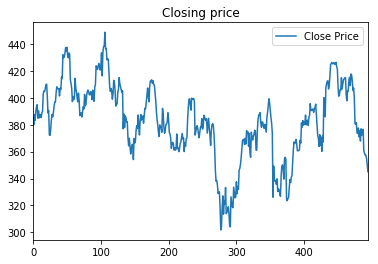

In [0]:
#Visualizing the closing data

company[["Close Price"]].plot()
plt.title("Closing price")
plt.show()

Text(0.5, 1.0, 'cummulative returns')

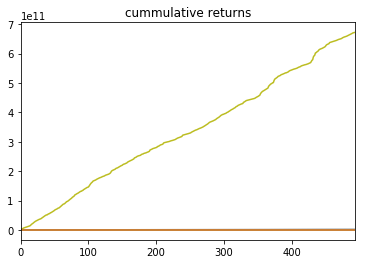

In [0]:
#Cummulative Return
df = company.cumsum()
#plt.legend
df.plot(legend=False)
plt.title("cummulative returns")



Text(0.5, 1.0, 'Company timeseries plot')

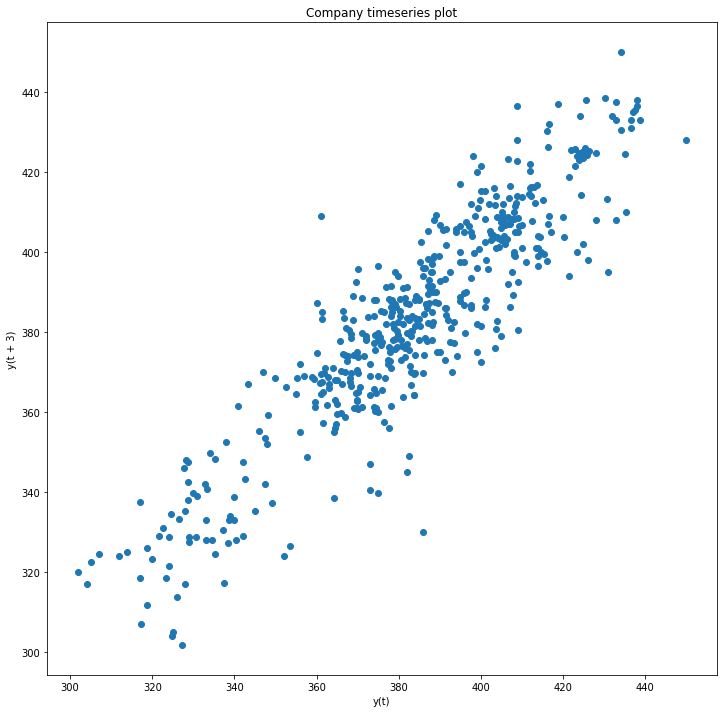

In [0]:
plt.figure(figsize=(12,12))
lag_plot(company['Open Price'],lag=3)
plt.title("Company timeseries plot")

Text(0.5, 1.0, 'Company timeseries plot')

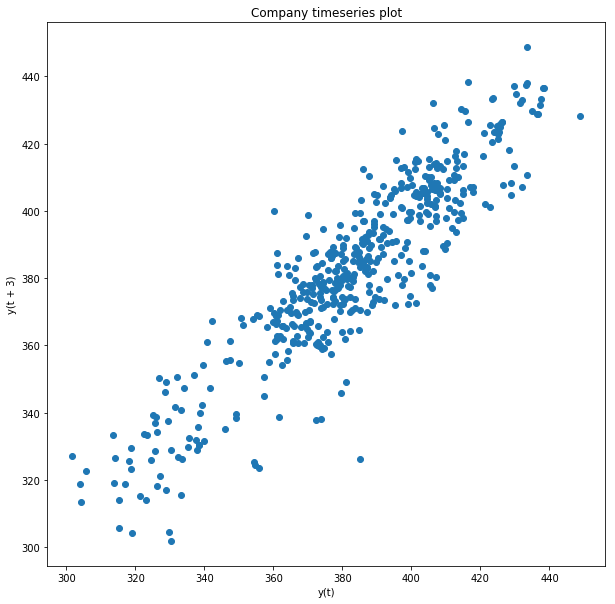

In [0]:
plt.figure(figsize=(10,10))
lag_plot(company['Close Price'],lag=3)
plt.title("Company timeseries plot")

In [0]:
train, test = company[0:int(len(company)*0.9)], company[int(len(company)*0.9):]
train.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ADANIPORTS,EQ,23-Aug-2017,375.65,378.10,386.20,378.10,385.00,385.00,382.33,3003871,1.148467e+09,43788,1456435,48.49
1,ADANIPORTS,EQ,24-Aug-2017,385.00,386.95,387.65,379.00,379.80,380.05,380.53,2507753,9.542675e+08,70769,1502442,59.91
2,ADANIPORTS,EQ,28-Aug-2017,380.05,382.00,389.85,380.50,387.70,387.50,387.29,3245331,1.256873e+09,85755,1833961,56.51
3,ADANIPORTS,EQ,29-Aug-2017,387.50,387.85,387.85,378.30,382.60,383.30,382.81,3419877,1.309155e+09,58505,2154296,62.99
4,ADANIPORTS,EQ,30-Aug-2017,383.30,386.00,392.40,385.05,389.15,389.75,388.80,2979277,1.158356e+09,77034,1536874,51.59


In [0]:
train

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ADANIPORTS,EQ,23-Aug-2017,375.65,378.10,386.20,378.10,385.00,385.00,382.33,3003871,1.148467e+09,43788,1456435,48.49
1,ADANIPORTS,EQ,24-Aug-2017,385.00,386.95,387.65,379.00,379.80,380.05,380.53,2507753,9.542675e+08,70769,1502442,59.91
2,ADANIPORTS,EQ,28-Aug-2017,380.05,382.00,389.85,380.50,387.70,387.50,387.29,3245331,1.256873e+09,85755,1833961,56.51
3,ADANIPORTS,EQ,29-Aug-2017,387.50,387.85,387.85,378.30,382.60,383.30,382.81,3419877,1.309155e+09,58505,2154296,62.99
4,ADANIPORTS,EQ,30-Aug-2017,383.30,386.00,392.40,385.05,389.15,389.75,388.80,2979277,1.158356e+09,77034,1536874,51.59
5,ADANIPORTS,EQ,31-Aug-2017,389.75,391.40,397.70,388.40,395.15,392.95,391.27,2775034,1.085793e+09,38097,1551332,55.90
6,ADANIPORTS,EQ,01-Sep-2017,392.95,394.95,396.50,391.70,394.70,394.90,394.28,1511368,5.959095e+08,31822,514295,34.03
7,ADANIPORTS,EQ,04-Sep-2017,394.90,396.00,396.00,380.30,384.25,384.85,385.05,2425859,9.340678e+08,79564,1028102,42.38
8,ADANIPORTS,EQ,05-Sep-2017,384.85,384.25,393.00,382.15,392.00,390.30,386.44,2363336,9.132760e+08,40886,1017134,43.04
9,ADANIPORTS,EQ,06-Sep-2017,390.30,388.90,388.90,384.40,385.00,385.05,386.40,1825546,7.053876e+08,42878,932721,51.09


In [0]:
test

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
445,ADANIPORTS,EQ,12-Jun-2019,426.30,425.25,429.40,423.00,425.80,424.95,425.60,2329686,9.915237e+08,31282,611047,26.23
446,ADANIPORTS,EQ,13-Jun-2019,424.95,424.00,426.30,422.50,424.60,424.95,424.70,2925612,1.242502e+09,36596,1512951,51.71
447,ADANIPORTS,EQ,14-Jun-2019,424.95,424.95,428.15,423.75,426.15,426.40,425.75,2745328,1.168819e+09,35881,1204654,43.88
448,ADANIPORTS,EQ,17-Jun-2019,426.40,426.00,426.35,422.10,423.70,422.85,424.02,2736051,1.160153e+09,23654,1376709,49.33
449,ADANIPORTS,EQ,18-Jun-2019,422.85,424.90,425.70,418.60,422.35,421.40,421.74,3509487,1.480100e+09,46405,1786201,50.21
450,ADANIPORTS,EQ,19-Jun-2019,421.40,423.50,424.85,400.70,407.40,407.70,414.49,5938743,2.461573e+09,58333,2615869,44.05
451,ADANIPORTS,EQ,20-Jun-2019,407.70,397.95,412.60,389.70,402.25,401.20,399.42,8383317,3.348457e+09,79687,2670501,31.85
452,ADANIPORTS,EQ,21-Jun-2019,401.20,402.15,407.65,397.65,402.55,402.00,402.59,4710025,1.896211e+09,46501,2014166,42.76
453,ADANIPORTS,EQ,24-Jun-2019,402.00,400.00,407.40,399.80,406.00,406.00,404.52,2582740,1.044779e+09,30902,931971,36.08
454,ADANIPORTS,EQ,25-Jun-2019,406.00,404.00,407.20,402.65,405.00,405.65,405.10,2099347,8.504512e+08,47304,905615,43.14


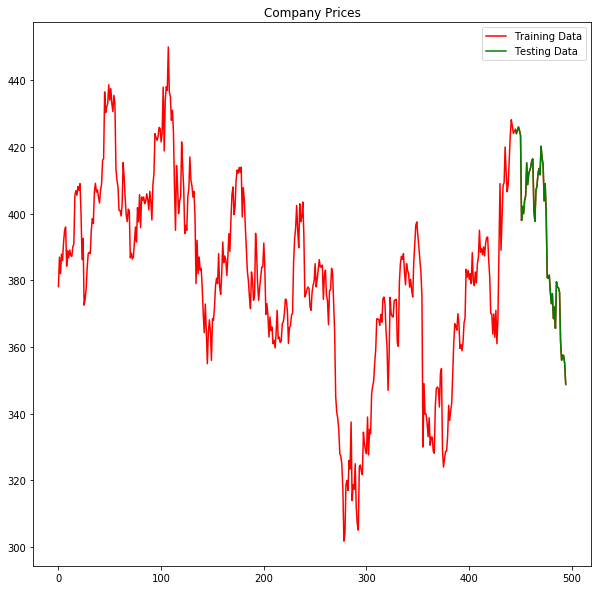

In [0]:
plt.figure(figsize=(10,10))
plt.title('Company Prices')
plt.plot(company['Open Price'], 'red', label='Training Data')
plt.plot(test['Open Price'], 'green', label='Testing Data')
#plt.plot(company['Close Price'], 'yellow', label='Training Data')
#plt.plot(test['Close Price'], 'blue', label='Testing Data')
plt.legend()

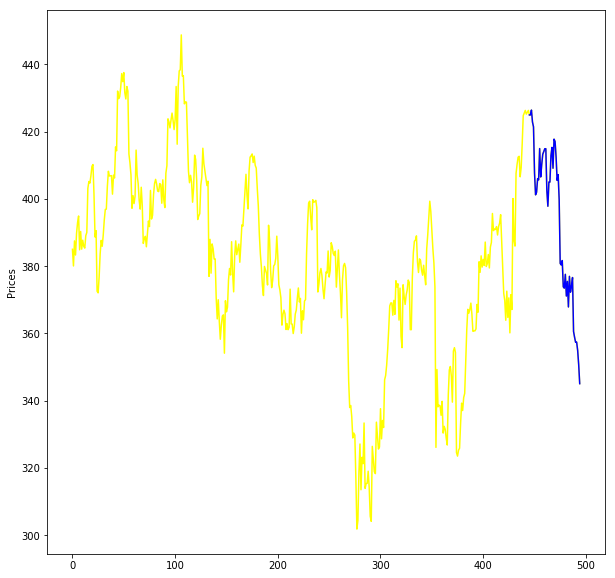

In [0]:
plt.figure(figsize=(10,10))
plt.ylabel('Prices')
plt.plot(company['Close Price'], 'yellow', label='Training Data')
plt.plot(test['Close Price'], 'blue', label='Testing Data')


In [0]:
#def smape_kun(y_true, y_pred):
#   return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

def return_rmse(y_true,y_pred):
    rmse = math.sqrt(mean_squared_error(y_true,y_pred))
    print("The root mean squared error is {}.".format(rmse))
    


In [0]:
train_model_close = train['Close Price'].values
test_model_close = test['Close Price'].values


In [0]:
#model training
#the order 3,1,0 is for the lag, difference order and moving time average
#fir disp=0 saves us from seeing all the debugging options
prev_close = [x for x in train_model_close]
hist = [x for x in train_model_close]
print(type(prev_close))
pred = []
for t in range(len(test_model_close)):
  model = ARIMA(hist, order=(3,1,0))
  model_fit = model.fit(disp=0)
  output = model_fit.forecast()
  yhat = output[0]
  pred.append(yhat)
  obs =  test_model_close[t]
  hist.append(obs)
  
  
error = return_rmse(test_model_close, pred)
print(error)
  


<class 'list'>
The root mean squared error is 6.340814269409937.
None


In [0]:
pred

[array([426.38010001]),
 array([425.22585907]),
 array([424.9932907]),
 array([426.35452262]),
 array([423.43697467]),
 array([421.52011627]),
 array([409.47265408]),
 array([401.5337655]),
 array([402.00449249]),
 array([405.76288278]),
 array([405.86634064]),
 array([413.81519014]),
 array([407.92760855]),
 array([409.26848048]),
 array([413.2789977]),
 array([414.04912036]),
 array([414.82879103]),
 array([414.98591945]),
 array([403.98435859]),
 array([397.928419]),
 array([404.33663539]),
 array([405.39861153]),
 array([411.83760745]),
 array([415.36398094]),
 array([409.77868253]),
 array([416.51805261]),
 array([417.64048581]),
 array([412.82282199]),
 array([406.2443635]),
 array([406.94218239]),
 array([400.89362362]),
 array([382.68385565]),
 array([379.86259667]),
 array([381.82232901]),
 array([374.76197139]),
 array([373.1890352]),
 array([377.14975949]),
 array([371.94726237]),
 array([374.67149838]),
 array([368.91798015]),
 array([375.52971693]),
 array([373.21526527]),

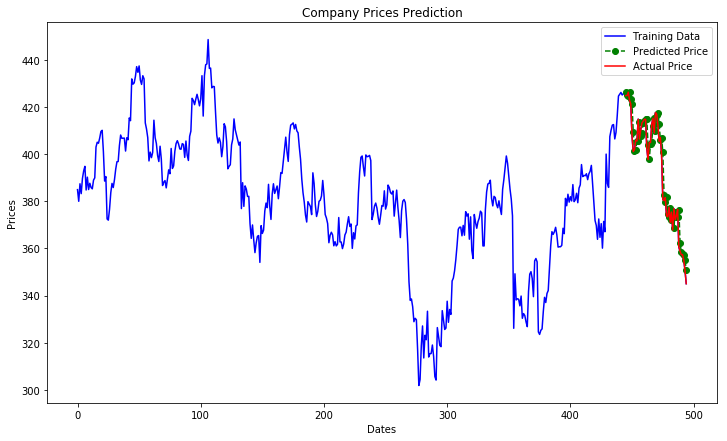

In [0]:
plt.figure(figsize=(12,7))
plt.plot(company['Close Price'], 'green', color='blue', label='Training Data')
plt.plot(test.index, pred, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test.index, test['Close Price'], color='red', label='Actual Price')
plt.title('Company Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
#plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

# LSTM SECTION

In [0]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [0]:
lcompany = pd.read_csv("ADANIPORTSALLN.csv")

In [0]:
lcompany

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ADANIPORTS,EQ,23-Aug-2017,375.65,378.10,386.20,378.10,385.00,385.00,382.33,3003871,1.148467e+09,43788,1456435,48.49
1,ADANIPORTS,EQ,24-Aug-2017,385.00,386.95,387.65,379.00,379.80,380.05,380.53,2507753,9.542675e+08,70769,1502442,59.91
2,ADANIPORTS,EQ,28-Aug-2017,380.05,382.00,389.85,380.50,387.70,387.50,387.29,3245331,1.256873e+09,85755,1833961,56.51
3,ADANIPORTS,EQ,29-Aug-2017,387.50,387.85,387.85,378.30,382.60,383.30,382.81,3419877,1.309155e+09,58505,2154296,62.99
4,ADANIPORTS,EQ,30-Aug-2017,383.30,386.00,392.40,385.05,389.15,389.75,388.80,2979277,1.158356e+09,77034,1536874,51.59
5,ADANIPORTS,EQ,31-Aug-2017,389.75,391.40,397.70,388.40,395.15,392.95,391.27,2775034,1.085793e+09,38097,1551332,55.90
6,ADANIPORTS,EQ,01-Sep-2017,392.95,394.95,396.50,391.70,394.70,394.90,394.28,1511368,5.959095e+08,31822,514295,34.03
7,ADANIPORTS,EQ,04-Sep-2017,394.90,396.00,396.00,380.30,384.25,384.85,385.05,2425859,9.340678e+08,79564,1028102,42.38
8,ADANIPORTS,EQ,05-Sep-2017,384.85,384.25,393.00,382.15,392.00,390.30,386.44,2363336,9.132760e+08,40886,1017134,43.04
9,ADANIPORTS,EQ,06-Sep-2017,390.30,388.90,388.90,384.40,385.00,385.05,386.40,1825546,7.053876e+08,42878,932721,51.09


In [0]:
lclose= lcompany["Close Price"]

In [0]:
lclose.shape

(495,)

In [0]:
ltrain=lclose.iloc[:396].values

In [0]:
ltest=lclose.iloc[396:].values

In [0]:
ltrain.reshape(396,1)


array([[385.  ],
       [380.05],
       [387.5 ],
       [383.3 ],
       [389.75],
       [392.95],
       [394.9 ],
       [384.85],
       [390.3 ],
       [385.05],
       [387.7 ],
       [385.9 ],
       [385.35],
       [389.05],
       [390.  ],
       [403.1 ],
       [405.15],
       [404.7 ],
       [406.9 ],
       [409.7 ],
       [410.2 ],
       [401.2 ],
       [388.65],
       [390.55],
       [372.55],
       [372.05],
       [376.75],
       [383.7 ],
       [387.65],
       [385.9 ],
       [389.25],
       [393.7 ],
       [396.85],
       [396.95],
       [403.7 ],
       [408.2 ],
       [406.8 ],
       [406.85],
       [406.9 ],
       [401.4 ],
       [407.05],
       [406.2 ],
       [415.45],
       [414.3 ],
       [432.05],
       [429.8 ],
       [430.35],
       [433.1 ],
       [437.25],
       [434.85],
       [437.55],
       [431.55],
       [429.7 ],
       [433.4 ],
       [432.05],
       [413.35],
       [410.75],
       [407.1 ],
       [397.2 

In [0]:
ltest.reshape(99,1)

array([[381.3 ],
       [378.15],
       [383.05],
       [379.7 ],
       [382.  ],
       [380.2 ],
       [387.15],
       [379.9 ],
       [380.7 ],
       [383.45],
       [379.45],
       [385.65],
       [387.05],
       [395.65],
       [390.55],
       [391.05],
       [390.9 ],
       [391.75],
       [389.25],
       [391.75],
       [392.8 ],
       [395.3 ],
       [387.25],
       [379.8 ],
       [371.9 ],
       [369.8 ],
       [363.9 ],
       [372.55],
       [364.75],
       [370.55],
       [360.15],
       [371.5 ],
       [367.1 ],
       [400.1 ],
       [387.6 ],
       [385.95],
       [407.55],
       [410.25],
       [412.4 ],
       [412.65],
       [406.55],
       [409.3 ],
       [416.4 ],
       [424.75],
       [425.55],
       [426.3 ],
       [425.2 ],
       [425.75],
       [426.3 ],
       [424.95],
       [424.95],
       [426.4 ],
       [422.85],
       [421.4 ],
       [407.7 ],
       [401.2 ],
       [402.  ],
       [406.  ],
       [405.65

In [0]:
sc = MinMaxScaler(feature_range=(0,1))

In [0]:
ltrain_scaled = sc.fit_transform(ltrain.reshape(396,1))

In [0]:
X_train = []
y_train = []
for i in range(5,396):
    X_train.append(ltrain_scaled[i-5:i,0])
    y_train.append(ltrain_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train

array([[0.56617897, 0.53249405, 0.58319156, 0.55461041, 0.59850289],
       [0.53249405, 0.58319156, 0.55461041, 0.59850289, 0.62027901],
       [0.58319156, 0.55461041, 0.59850289, 0.62027901, 0.63354883],
       ...,
       [0.4572984 , 0.43518203, 0.4001361 , 0.40115686, 0.40115686],
       [0.43518203, 0.4001361 , 0.40115686, 0.40115686, 0.40523988],
       [0.4001361 , 0.40115686, 0.40115686, 0.40523988, 0.45457639]])

In [0]:
##
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [0]:
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
391/391 [==============================] - 4s 10ms/step - loss: 0.1150
Epoch 2/50
391/391 [==============================] - 0s 712us/step - loss: 0.0203
Epoch 3/50
391/391 [==============================] - 0s 720us/step - loss: 0.0166
Epoch 4/50
391/391 [==============================] - 0s 760us/step - loss: 0.0187
Epoch 5/50
391/391 [==============================] - 0s 767us/step - loss: 0.0141
Epoch 6/50
391/391 [==============================] - 0s 723us/step - loss: 0.0168
Epoch 7/50
391/391 [==============================] - 0s 717us/step - loss: 0.0124
Epoch 8/50
391/391 [==============================] - 0s 770us/step - loss: 0.0204
Epoch 9/50
391/391 [==============================] - 0s 727us/step - loss: 0.0130
Epoch 10/50
391/391 [==============================] - 0s 739us/step - loss: 0.0153
Epoch 11/50
391/391 [==============================] - 0s 808us/step - loss: 0.0149
Epoch 12/50
391/391 [==============================] - 0s 798us/step - loss: 0.0142
Ep

In [0]:
dataset_total = pd.concat((pd.Series(ltrain),pd.Series(ltest)),axis=0)
inputs = dataset_total[len(dataset_total)-len(ltest) - 5:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [0]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(5,99):
    X_test.append(inputs[i-5:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

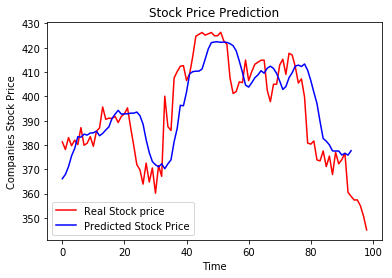

In [0]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Stock price')
    plt.plot(predicted, color='blue',label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Companies Stock Price')
    plt.legend()
    plt.show()
plot_predictions(ltest,predicted_stock_price)

In [0]:
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    
return_rmse(ltest[:94],predicted_stock_price)

The root mean squared error is 11.667034900194658.
